# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Bob', 'Alice', 'Chuck']

In [3]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Bob', 'Alice'), ('Bob', 'Chuck'), ('Alice', 'Bob'), ('Alice', 'Chuck')]

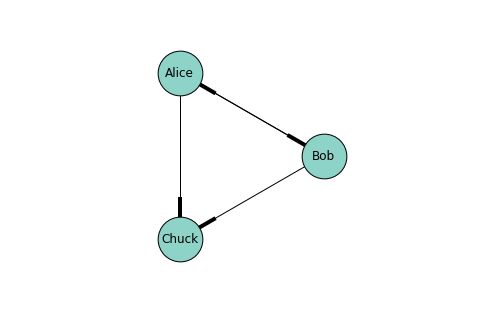

In [4]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

In [5]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

In [6]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Boston', 'Philly', 'Albany']

In [7]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

In [8]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Boston'), ('NYC', 'Philly'), ('NYC', 'Albany'), ('Boston', 'Albany')]

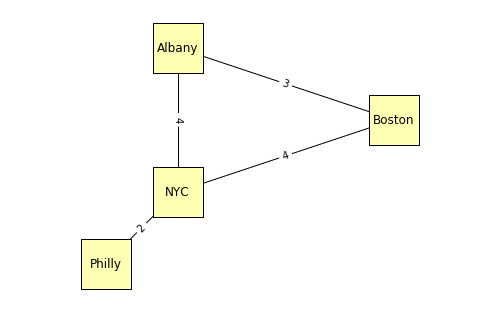

In [9]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

In [10]:
def all_pairs(nodes):
    for i, node1 in enumerate(nodes):
        for j, node2 in enumerate(nodes):
            if i>j:
                yield node1, node2

In [11]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [12]:
complete = make_complete_graph(10)
len(complete.nodes())

10

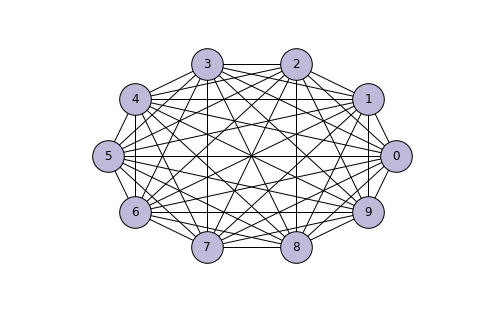

In [13]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

In [14]:
from numpy.random import random

def flip(p):
    return random() < p

In [15]:
def random_pairs(nodes, p):
    for i, node1 in enumerate(nodes):
        for j, node2 in enumerate(nodes):
            if i>j and flip(p):
                yield node1, node2

In [16]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [17]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

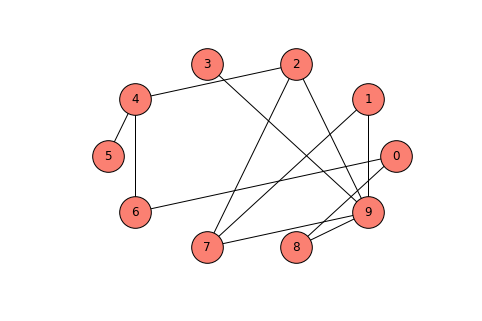

In [18]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

In [19]:
def reachable_nodes(G, start):
    reachable = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node in reachable:
            continue
        reachable.add(node)
        stack.extend(G.neighbors(node))
    return reachable

In [20]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [21]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [22]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

In [23]:
is_connected(complete)

True

In [24]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [25]:
is_connected(random_graph)

False

In [26]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [27]:
prob_connected(100, 0.01)

0.0

In [28]:
ps = np.logspace(-2.5, 0, 11)
ps

array([ 0.00316228,  0.00562341,  0.01      ,  0.01778279,  0.03162278,
        0.05623413,  0.1       ,  0.17782794,  0.31622777,  0.56234133,  1.        ])

In [29]:
%time ys = [prob_connected(100, p) for p in ps]
ys

CPU times: user 3.8 s, sys: 0 ns, total: 3.8 s
Wall time: 3.79 s


[0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0]

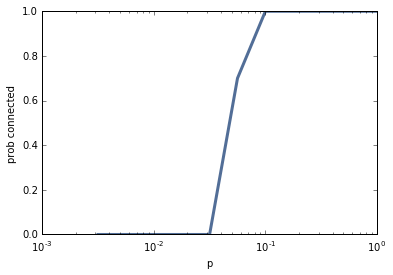

In [30]:
import thinkplot

thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log')

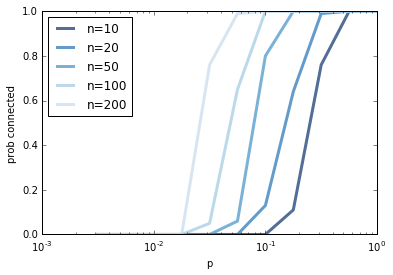

In [32]:
ns = [10, 20, 50, 100, 200]
thinkplot.preplot(len(ns))
for n in ns:
    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)
thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', 
                 loc='upper left')
plt.savefig('chap02-5.pdf')